In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

def level(value):
    max_value = 100
    if value < max_value*1/5:
        return 'bad'
    elif value < max_value*2/5:
        return 'medium'
    elif value < max_value*3/5:
        return 'good'
    else:
        return 'top'

df = pd.read_csv('../data/example.csv', index_col='index')

# create level tags for performance
df['level'] = [level(v) for v in df['performance']]

# rearrange data into x and y
X = df[[f'env_{i}' for i in range(1,7)]]
y = df['level']

# split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
df

,gen,env_1,env_2,env_3,env_4,env_5,env_6,performance,level
index,,,,,,,,,
1,1.0,0.625460,-0.623824,-0.010979,-0.041464,0.066297,-0.012048,36.0,medium
2,1.0,0.030484,-0.522590,-0.045638,0.041322,-0.095461,-0.061682,31.0,medium
3,1.0,-1.816408,0.810349,0.062615,0.007314,0.087218,-0.044141,43.0,good
4,1.0,-1.165842,0.687061,0.003418,-0.062432,0.041654,0.075918,40.0,good
5,1.0,0.978160,-0.141962,-0.047831,-0.102162,-0.025702,-0.029755,31.0,medium
...,...,...,...,...,...,...,...,...,...
63996,20.0,0.509149,0.017309,-0.059962,-0.124717,-0.070285,-0.039449,46.0,good
63997,20.0,-0.487365,-0.818211,-0.097533,-0.092180,-0.008004,0.053800,33.0,medium
63998,20.0,1.933019,-0.846745,-0.057941,-0.049997,-0.066012,0.054918,56.0,good


In [ ]:

clf = MLPClassifier(
    hidden_layer_sizes=(6,3,5),
    alpha=0.0001,
    max_iter=2000,
    solver='sgd',
    random_state=42,
    tol=0.000005
)

clf.fit(X_train, y_train)

filename = 'specialist.sav'
pickle.dump(clf, open(filename, 'wb'))

0.8520359848484849
0.8520359848484849


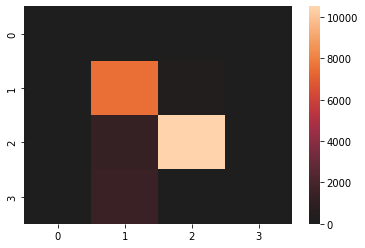

In [15]:
cfl = pickle.load(open(filename, 'rb'))
result = cfl.score(X_test, y_test)
result

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, center=True)
plt.show()